# Token annotation overlaps

## Read mapping information

In [1]:
import os

import pandas as pd


demoTrainDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_train.csv', sep='\t')
demoTestDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_test.csv', sep='\t')
demoValidateDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_validate.csv', sep='\t')
demoDf = pd.concat([demoTrainDf, demoTestDf, demoValidateDf], ignore_index=True)
demoDf

,person_id,visit_occurrence_id,TYPE,COUNTRY_OF_BIRTH,SEX,Age_Bin,JOURNEY_ID
0,678487,3312694,Emergency,Australia,Male,"(60, 70]",3312694
1,2094045,9199249,Emergency,Australia,Male,"(20, 30]",9199249
2,2107813,9410987,Emergency,Australia,Male,"(50, 60]",9410987
3,2083212,602890,Inpatient,Australia,Female,"(40, 50]",9039437
4,2083212,9039437,Emergency,Australia,Female,"(40, 50]",9039437
...,...,...,...,...,...,...,...
7194,2603535,16588204,Inpatient,Australia,Male,"(60, 70]",16588204
7195,2603535,16709341,Inpatient,Australia,Male,"(60, 70]",16709341
7196,2603535,16651755,Inpatient,Australia,Male,"(60, 70]",16651755
7197,2098616,16872774,Emergency,Australia,Female,"(80, 90]",16872774


In [2]:
import os

mappingDf = pd.read_csv(os.environ['GENOMICS_DATA_BASE'] + '/patient_tube_id_mapping_full.tsv', sep='\t')
mappingDf

,tube_code,PATIENT_ID,db_ID,pt_age,pt_gender,EPISODE_ID,hospital_admission,hospital_discharge,hospital_in_last_year,genome_species,species_reported,contig_number,length,tube_code_duplicate_or_old,date_of_collection,ID_number,location_additional_02,collected_from_original
0,AH19J072,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Escherichia coli,Escherichia coli,92,5131021,NaN,2019-10-30,19-303-0997,A-7EA;HAEM,Blood
1,AH19J074,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Streptococcus sp. D19,Streptococcus mitis group,84,2022991,NaN,2019-10-30,19-303-1174,A-7EA;HAEM,Blood Peripheral
2,AH19B003,526238.0,567AE,85,Male,640261.0,2019-02-04,2019-02-07,no,Escherichia coli,Escherichia coli,93,4942915,NaN,2019-02-03,19-034-1596,A-4WB;GMC,Blood
3,AH20A024,788941.0,3YBDS,58,Female,13194824.0,2020-01-16,2020-01-19,no,Escherichia coli,Escherichia coli,110,5149157,NaN,2020-01-16,20-016-2112,S-ED;Emergency,Blood Venous
4,AH20L041,1023735.0,2VJ78,42,Male,14210147.0,2020-12-18,2021-01-05,yes,Staphylococcus aureus,Staphylococcus aureus,46,2735216,NaN,2020-12-16,20-351-2856,Emergency Dept;nan,Blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,ALF22L076,639020.0,3S6HL,84,Male,17219899.0,2022-12-15,2022-12-20,yes,Streptococcus vestibularis,Streptococcus salivarius group,107,1938627,NaN,2022-12-15,22-349-2150,Ward 4WB,Blood Peripheral
3113,ALF22L089,655404.0,6EWBM,67,Female,NaN,NaN,NaN,NaN,Proteus columbae,Proteus vulgaris,152,3972219,NaN,2022-12-17,22-351-1465,Comm/Amb Clinic,Blood
3114,ALF22L138,2572048.0,YM5PJ,61,Male,NaN,NaN,NaN,NaN,Enterobacter roggenkampii,Enterobacter cloacae complex,66,4876179,NaN,2022-12-27,22-361-0202,Ward 7 East,Hick White Lum
3115,ALF23A102,2054964.0,5DYAH,35,Female,17294287.0,2023-01-12,2023-02-01,yes,Streptococcus constellatus,Streptococcus anginosus group,54,1869828,NaN,2023-01-11,23-011-3305,ICU,Blood Venous


In [3]:
mappedJourneyTubeIdsDf = mappingDf[['tube_code', 'PATIENT_ID', 'EPISODE_ID']].drop_duplicates().merge(
    demoDf[['person_id', 'visit_occurrence_id', 'JOURNEY_ID']],
    how='inner',
    left_on=['PATIENT_ID', 'EPISODE_ID'],
    right_on=['person_id', 'visit_occurrence_id']
).drop(
    columns=['PATIENT_ID', 'EPISODE_ID', 'visit_occurrence_id']
)[['person_id', 'JOURNEY_ID', 'tube_code']].drop_duplicates()
mappedJourneyTubeIdsDf

,person_id,JOURNEY_ID,tube_code
0,50056,13224842,AH20B011
1,62567,12645629,AH19G065
2,138108,14737781,AH21E052
3,211314,13955099,AH20J009
4,211314,13955099,KPN2214
...,...,...,...
512,2084373,16158768,ALF22C004
513,1058066,16759482,ALF22H089
514,2552781,16966609,ALF22J054
515,2638484,16969999,ALF22K143


## Read tokens

In [4]:
import os
import pandas as pd
from pathlib import Path


bedDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'bed_files')

bedDfList = []
for bedFile in os.listdir(bedDir):
    df = pd.read_csv(Path(bedDir, bedFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score'])
    df['tube_code'] = [bedFile.split('_')[0]]*df.shape[0]
    bedDfList.append(df)

tokensDf = pd.concat(bedDfList, ignore_index=True)
tokensDf = tokensDf.merge(
    mappedJourneyTubeIdsDf,
    how='inner',
    on=['tube_code']
)
tokensDf

,contig_id,start_position,end_position,tokens,score,tube_code,person_id,JOURNEY_ID
0,1,2,8,AGAAAAA,-0.016512,ALF23C128,2647426,17410677
1,1,9,14,ACTGAG,-0.003881,ALF23C128,2647426,17410677
2,1,15,20,TAGCAT,-0.008285,ALF23C128,2647426,17410677
3,1,21,26,AAATGG,0.002747,ALF23C128,2647426,17410677
4,1,27,31,ATCTG,-0.015229,ALF23C128,2647426,17410677
...,...,...,...,...,...,...,...,...
253149,48,74,81,TATTTTTT,0.036607,ALF22E113,2176805,16467632
253150,48,82,88,AACCAAA,-0.019295,ALF22E113,2176805,16467632
253151,48,89,93,ATTTG,-0.023516,ALF22E113,2176805,16467632
253152,48,94,99,ATTAAA,-0.027809,ALF22E113,2176805,16467632


## Read annotations

In [5]:
import os
import pandas as pd


annotationsDfList = []

gffDir = os.environ['GENOMICS_DATA_BASE'] + '/annotations/s_aureus_gff3'

for fileName in os.listdir(gffDir):

    tubeCode = fileName.split('.')[0]

    gffDf = pd.read_csv(
        gffDir + '/' + fileName,
        sep='\t',
        comment='#',
        names=['sequence_id', 'source', 'feature_type', 'feature_start', 'feature_end', 'score', 'strand', 'phase', 'atributes']
    )
    gffDf['id'] = gffDf.atributes.apply(lambda x: [att.split('=')[1] for att in x.split(';') if att.split('=')[0] == 'ID']).apply(lambda x: None if (len(x) == 0) else x[0])
    gffDf['name'] = gffDf.atributes.apply(lambda x: [att.split('=')[1] for att in x.split(';') if att.split('=')[0] == 'Name']).apply(lambda x: None if (len(x) == 0) else x[0])
    gffDf['gene'] = gffDf.atributes.apply(lambda x: [att.split('=')[1] for att in x.split(';') if att.split('=')[0] == 'gene']).apply(lambda x: None if (len(x) == 0) else x[0])
    gffDf['tube_code'] = tubeCode
    annotationsDfList.append(gffDf)

annotationsDf = pd.concat(annotationsDfList, ignore_index=True)
annotationsDf = annotationsDf.merge(
    mappedJourneyTubeIdsDf,
    how='inner',
    on=['tube_code']
)
annotationsDf = annotationsDf[annotationsDf.feature_type != 'region']
annotationsDf

,sequence_id,source,feature_type,feature_start,feature_end,score,strand,phase,atributes,id,name,gene,tube_code,person_id,JOURNEY_ID
1,1,Prodigal,CDS,214,465,.,+,0,ID=CENNFK_00005;Name=Transposase;locus_tag=CEN...,CENNFK_00005,Transposase,None,AH21B039,908851,14408941
2,1,Prodigal,CDS,475,972,.,+,0,ID=CENNFK_00010;Name=Thioredoxin/glutathione p...,CENNFK_00010,Thioredoxin/glutathione peroxidase BtuE%2C red...,btuE,AH21B039,908851,14408941
3,1,Prodigal,CDS,1363,3243,.,+,0,ID=CENNFK_00015;Name=assimilatory sulfite redu...,CENNFK_00015,assimilatory sulfite reductase (NADPH) flavopr...,cysJ,AH21B039,908851,14408941
4,1,Prodigal,CDS,3309,3917,.,+,0,ID=CENNFK_00020;Name=NAD(P)-binding protein;lo...,CENNFK_00020,NAD(P)-binding protein,cysG2,AH21B039,908851,14408941
5,1,Prodigal,CDS,4406,5776,.,+,0,ID=CENNFK_00025;Name=Mg2+/citrate symporter;lo...,CENNFK_00025,Mg2+/citrate symporter,citM,AH21B039,908851,14408941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208574,30,tRNAscan-SE,tRNA,75,149,.,-,.,ID=CONGNE_13210;Name=tRNA-Asn(gtt);locus_tag=C...,CONGNE_13210,tRNA-Asn(gtt),trnN,AH21J041,2251684,15514899
208576,31,Prodigal,CDS,38,160,.,+,0,ID=CONGNE_13215;Name=EF-hand domain-containing...,CONGNE_13215,EF-hand domain-containing protein,None,AH21J041,2251684,15514899
208578,32,tRNAscan-SE,tRNA,17,93,.,+,.,ID=CONGNE_13220;Name=tRNA-Ile(gat);locus_tag=C...,CONGNE_13220,tRNA-Ile(gat),trnI,AH21J041,2251684,15514899
208579,32,tRNAscan-SE,tRNA,115,180,.,+,.,ID=CONGNE_13225;Name=tRNA-Ala(tgc);locus_tag=C...,CONGNE_13225,tRNA-Ala(tgc),trnA,AH21J041,2251684,15514899


## Obtain for overlaps

In [6]:
from tqdm import tqdm

overlapList = []
overlappingAnnotationsDfList = []

for i, row in tqdm(tokensDf.iterrows()):
    overlappingAnnotationsDf = annotationsDf[(annotationsDf.tube_code == row.tube_code) & (annotationsDf.sequence_id == row.contig_id) & (row.start_position >= annotationsDf.feature_start) & (row.end_position <= annotationsDf.feature_end)]
    overlappingAnnotationsDfList.append(overlappingAnnotationsDf)
    overlap = (overlappingAnnotationsDf.shape[0] > 0)
    overlapList.append(overlap)

253154it [43:01, 98.07it/s] 


In [7]:
tokensDf['overlap'] = overlapList
tokensDf

,contig_id,start_position,end_position,tokens,score,tube_code,person_id,JOURNEY_ID,overlap
0,1,2,8,AGAAAAA,-0.016512,ALF23C128,2647426,17410677,False
1,1,9,14,ACTGAG,-0.003881,ALF23C128,2647426,17410677,False
2,1,15,20,TAGCAT,-0.008285,ALF23C128,2647426,17410677,False
3,1,21,26,AAATGG,0.002747,ALF23C128,2647426,17410677,False
4,1,27,31,ATCTG,-0.015229,ALF23C128,2647426,17410677,False
...,...,...,...,...,...,...,...,...,...
253149,48,74,81,TATTTTTT,0.036607,ALF22E113,2176805,16467632,False
253150,48,82,88,AACCAAA,-0.019295,ALF22E113,2176805,16467632,False
253151,48,89,93,ATTTG,-0.023516,ALF22E113,2176805,16467632,False
253152,48,94,99,ATTAAA,-0.027809,ALF22E113,2176805,16467632,False


In [8]:
import pandas as pd

overlappingAnnotationsDf = pd.concat(overlappingAnnotationsDfList, ignore_index=True)
overlappingAnnotationsDf = overlappingAnnotationsDf.drop_duplicates()
overlappingAnnotationsDf

,sequence_id,source,feature_type,feature_start,feature_end,score,strand,phase,atributes,id,name,gene,tube_code,person_id,JOURNEY_ID
0,1,Prodigal,CDS,67,933,.,-,0,ID=AOOOAL_00005;Name=Pyruvate:ferredoxin oxido...,AOOOAL_00005,Pyruvate:ferredoxin oxidoreductase or related ...,porB,ALF23C128,2647426,17410677
76,3,Prodigal,CDS,30,323,.,+,0,ID=AOOOAL_04555;Name=Thiamin-binding stress-re...,AOOOAL_04555,Thiamin-binding stress-response protein YqgV%2...,yqgV,ALF23C128,2647426,17410677
128,3,Prodigal,CDS,457,2001,.,+,0,ID=AOOOAL_04560;Name=tRNA (N6-isopentenyl aden...,AOOOAL_04560,tRNA (N6-isopentenyl adenosine(37)-C2)-methylt...,miaB,ALF23C128,2647426,17410677
137,4,Prodigal,CDS,378,683,.,-,0,ID=AOOOAL_06030;Name=Alpha/beta hydrolase;locu...,AOOOAL_06030,Alpha/beta hydrolase,None,ALF23C128,2647426,17410677
160,5,Prodigal,CDS,86,292,.,+,0,ID=AOOOAL_07110;Name=copper chaperone CopZ;loc...,AOOOAL_07110,copper chaperone CopZ,copZ,ALF23C128,2647426,17410677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121166,31,Prodigal,CDS,389,613,.,-,0,ID=HJKOMD_13555;Name=Serine proteinase;locus_t...,HJKOMD_13555,Serine proteinase,None,ALF22E113,2176805,16467632
121188,32,tRNAscan-SE,tRNA,66,142,.,+,.,ID=HJKOMD_13560;Name=tRNA-Ile(gat);locus_tag=H...,HJKOMD_13560,tRNA-Ile(gat),trnI,ALF22E113,2176805,16467632
121203,32,tRNAscan-SE,tRNA,161,236,.,+,.,ID=HJKOMD_13565;Name=tRNA-Ala(tgc);locus_tag=H...,HJKOMD_13565,tRNA-Ala(tgc),trnA,ALF22E113,2176805,16467632
121219,45,Infernal,rRNA,2,116,1.1e-11,-,.,ID=HJKOMD_13570;Name=5S ribosomal RNA;locus_ta...,HJKOMD_13570,5S ribosomal RNA,rrf,ALF22E113,2176805,16467632


### Overlapping tokens with annotations

In [9]:
tokensDf.overlap.value_counts()

overlap
False    132257
True     120897
Name: count, dtype: int64

<Axes: xlabel='overlap'>

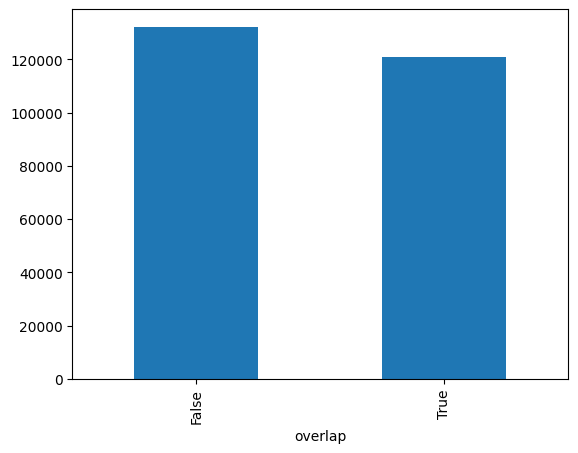

In [10]:
tokensDf.overlap.value_counts().plot(kind = 'bar')

### Overlapping annotations with tokens

### Feature type wise overlapping counts

In [11]:
overlappingAnnotationsDf.feature_type.value_counts()

feature_type
CDS                  1717
tRNA                 1049
rRNA                  220
ncRNA                 167
oriC                    6
regulatory_region       2
oriT                    1
Name: count, dtype: int64

<Axes: xlabel='feature_type'>

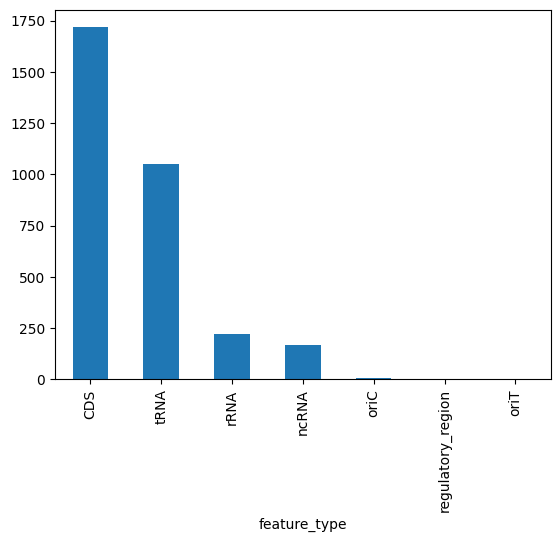

In [12]:
overlappingAnnotationsDf.feature_type.value_counts().plot(kind = 'bar')

### Top overlapping annotation names

In [13]:
overlappingAnnotationsDf.name.value_counts().reset_index()[:30]

,name,count
0,tRNA-Lys(ttt),116
1,tRNA-Ala(tgc),106
2,tRNA-Gly(gcc),91
3,tRNA-Leu(taa),90
4,Phage protein,86
5,tRNA-Val(tac),86
6,tRNA-Ile(gat),82
7,tRNA-Gly(tcc),63
8,16S ribosomal RNA,60
9,tRNA-Thr(tgt),53


### Top overlappig gene names

In [14]:
overlappingAnnotationsDf.gene.value_counts()[:20]

gene
trnL     183
trnG     154
trnK     116
trnA     106
tsr24     90
trnV      86
rrl       85
rrs       83
trnI      82
tnp       68
trnT      53
rrf       52
trnN      49
trnR      49
trnE      49
mrp       41
trnP      38
trnQ      36
trnY      35
ldcC      32
Name: count, dtype: int64

### Historam of tube code wise overlapping counts

In [15]:
overlappingAnnotationsDf.tube_code.value_counts().reset_index()

,tube_code,count
0,ALF22L046,102
1,AH20J014,83
2,AH21B039,77
3,AH19H051,75
4,AH20E051,72
...,...,...
70,ALF23A081,23
71,AH19E065,20
72,AH20K024,20
73,AH19C091,19


<Axes: >

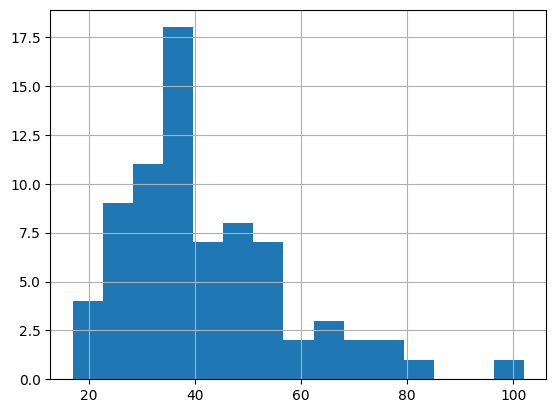

In [16]:
overlappingAnnotationsDf.tube_code.value_counts().reset_index()['count'].hist(bins=15)